In [1]:
import sys
from arnie.mfe import mfe
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
nan = np.nan

In [2]:
#Replace '-999'in shape data to nan 
def shape_lines_unnorm(shape_lines):
    all_shape_lines_no_nan = []
    for number in shape_lines:
        if number == '-999\n':
            all_shape_lines_no_nan.append('nan')
        elif number =='nan\n':
             all_shape_lines_no_nan.append('nan')
        elif number =='nan': #line added for 'nan' in dms shape
             all_shape_lines_no_nan.append('nan')
        else:
            all_shape_lines_no_nan.append(number)   
    float_lines=[float(i) for i in all_shape_lines_no_nan]
    return (float_lines)

In [3]:
#Nrmalizzing the shape data
def normalize_shape(shape_reacs):
    shape_reacs = np.array(shape_reacs)

    # Get rid of nan values for now
    nonan_shape_reacs = shape_reacs[~np.isnan(shape_reacs)]

    # Find Filter 1: 1.5 * Inter-Quartile Range
    sorted_shape = np.sort(nonan_shape_reacs)
    q1 = sorted_shape[int(0.25 * len(sorted_shape))]
    q3 = sorted_shape[int(0.75 * len(sorted_shape))]
    iq_range = abs(q3 - q1)
    filter1 = next(x for x, val in \
        enumerate(list(sorted_shape)) if val > 1.5 * iq_range)

    # Find Filter 2: 95% value
    filter2 = int(0.95 * len(sorted_shape))

    # Get maximum filter value and fiter data
    filter_cutoff = sorted_shape[max(filter1, filter2)]
    sorted_shape = sorted_shape[sorted_shape < filter_cutoff]

    # Scalefactor: Mean of top 10th percentile of values
    top90 = sorted_shape[int(0.9 * len(sorted_shape))]
    scalefactor = np.mean(sorted_shape[sorted_shape > top90])
        
    # Scale dataset
    return shape_reacs/scalefactor

In [4]:
#Possible normalized shape values 0-2
def shape_norm_for_heatmap(shape_norm):
    all_shape_lines_no_nan = []
    for number in shape_norm:
        if number < 0:
            all_shape_lines_no_nan.append(0)
        elif number > 2:
            all_shape_lines_no_nan.append(2)
        else:
            all_shape_lines_no_nan.append(number)   
    float_lines=[float(i) for i in all_shape_lines_no_nan]
    return (float_lines)

In [5]:
#Half the shape values
def divide_by_2(shape_lines):
    quotients = []
    for number in shape_lines:
        quotients.append(number / 2)
    return quotients

In [6]:
#Nest function for inputting the shape_lines
def function_for_heatmap_data(shape_lines):
    shape_lines_unnormalize = shape_lines_unnorm(shape_lines) 
    shape_lines_norm = normalize_shape(shape_lines_unnormalize)
    shape_norm_for_heatmap_var = shape_norm_for_heatmap(shape_lines_norm)
    shape_output = divide_by_2(shape_norm_for_heatmap_var)
    return shape_output

In [7]:
def new_import(file_name):
    shape_fname = file_name 
    f = open(shape_fname,encoding='utf-8-sig')
    shape_lines= f.readlines()
    f.close()
    return shape_lines

In [8]:
#Changing "T" to "U" in sequence 
def sequence_no_T(sequence):
    reactivity_no_GU= []
    for idx in range(0, len(sequence)):
        if sequence[idx] =='T':
            reactivity_no_GU.append('U')
        else:
            reactivity_no_GU.append(sequence[idx])
    return reactivity_no_GU

In [9]:
# Replacing dot bracket to binary notation
def bp_func(dot_bracket):
    struct_sim= []
    for idx in range(0, len(dot_bracket)):
        if dot_bracket[idx] == ".":
            struct_sim.append(1) #1 means base is unpaired
        else:
            struct_sim.append(0) #0 means base is paired
    return(struct_sim)

In [10]:
#Half the shape values
def divide_by_2(shape_lines):
    quotients = []
    for number in shape_lines:
        quotients.append(number / 2)
    return quotients

In [11]:
#SARS-Cov-2 whole genome sequence
f = open('refseq.txt')
whole_genome= f.readlines()[0].strip('\n').replace('T','U')
f.close()

In [12]:
#Import shape data from csv files
shape_lines_incarnato = new_import('incarnato_normalized_reactivity.csv')
shape_lines_pyle = new_import('pyle_normalized_reactivity.csv')
shape_lines_zhang_invivo = new_import('zhang_invivo_normalized_reactivity.csv')
shape_lines_zhang_invitro = new_import('zhang_invitro_normalized_reactivity.csv') 

In [13]:
#
shape_norm_for_heatmap_incarnato_whole_genome =function_for_heatmap_data(shape_lines_incarnato)

shape_norm_for_heatmap_pyle_whole_genome =function_for_heatmap_data(shape_lines_pyle)

shape_norm_for_heatmap_zhang_invivo_whole_genome =function_for_heatmap_data(shape_lines_zhang_invivo)

shape_norm_for_heatmap_zhang_invitro_whole_genome = function_for_heatmap_data(shape_lines_zhang_invitro)

In [14]:
#xaxis
position_whole_genome=list(range(1,29904))
xaxis_whole_genome = [''.join([whole_genome[i], str(position_whole_genome[i])]) for i in range(0, len(position_whole_genome))]

In [15]:
def covert_conservation_to_floats(conservation_lines):
    conservation_numbers = []
    for number in conservation_lines:
        if number == '\ufeff1\n':
            conservation_numbers.append(1)
        else:
            conservation_numbers.append(number)   
    float_lines=[float(i) for i in conservation_numbers]
    return (float_lines)

In [16]:
#Conservation track
sars_conservation_lines = new_import('sarsr_conservation.csv') 
conservation_floats = covert_conservation_to_floats(sars_conservation_lines)
conservation_whole_genome = conservation_floats

In [17]:
#Datasets in 100 nucleotide windows
shape_norm_for_heatmap_pyle_whole_genome_frag =([shape_norm_for_heatmap_incarnato_whole_genome[i:i+100] for i in range(0, len(shape_norm_for_heatmap_incarnato_whole_genome), 100)])

shape_norm_for_heatmap_incarnato_whole_genome_frag =([shape_norm_for_heatmap_pyle_whole_genome[i:i+100] for i in range(0, len(shape_norm_for_heatmap_pyle_whole_genome), 100)])

shape_norm_for_heatmap_zhang_invivo_whole_genome_frag =([shape_norm_for_heatmap_zhang_invivo_whole_genome[i:i+100] for i in range(0, len(shape_norm_for_heatmap_zhang_invivo_whole_genome), 100)])

shape_norm_for_heatmap_zhang_invitro_whole_genome_frag =([shape_norm_for_heatmap_zhang_invitro_whole_genome[i:i+100] for i in range(0, len(shape_norm_for_heatmap_zhang_invitro_whole_genome), 100)])

In [18]:
#supplementary data in 100 nucleotide windows
xaxis_whole_genome_frag =([xaxis_whole_genome[i:i+100] for i in range(0, len(xaxis_whole_genome), 100)])
conservation_whole_genome_frag =([conservation_whole_genome[i:i+100] for i in range(0, len(conservation_whole_genome), 100)])

In [44]:
#Import structured prediction data; for i in data: [start nucleotide, end nucleotide, sequence, dot bracket, nan]
incarnato_predicted_structure_lines = new_import('incarnato_secondary_structures.csv')
pyle_predicted_structure_lines = new_import('pyle_predicted_structures.csv')

In [45]:
incarnato_start=([incarnato_predicted_structure_lines[i].split(',')[0] for i in range(0, len(incarnato_predicted_structure_lines))])
incarnato_start_integers=[int(i) for i in incarnato_start]

pyle_start=([pyle_predicted_structure_lines[i].split(',')[0] for i in range(0, len(pyle_predicted_structure_lines))])
pyle_start_integers=[int(i) for i in pyle_start]


In [46]:
incarnato_end=([incarnato_predicted_structure_lines[i].split(',')[1] for i in range(0, len(incarnato_predicted_structure_lines))])
incarnato_end_integers=[int(i) for i in incarnato_end]

pyle_end=([pyle_predicted_structure_lines[i].split(',')[1] for i in range(0, len(pyle_predicted_structure_lines))])
pyle_end_integers=[int(i) for i in pyle_end]

moorman_end=([moorman_predicted_structure_lines[i].split(',')[1] for i in range(0, len(moorman_predicted_structure_lines))])
moorman_end_integers=[int(i) for i in moorman_end]

In [47]:
incarnato_struct=([incarnato_predicted_structure_lines[i].split(',')[3] for i in range(0, len(incarnato_predicted_structure_lines))])

pyle_struct=([pyle_predicted_structure_lines[i].split(',')[3] for i in range(0, len(pyle_predicted_structure_lines))])

In [48]:
#Convert dot bracket to binary
incarnato_struct_dot=([bp_func(incarnato_struct[i]) for i in range(0, len(incarnato_predicted_structure_lines))])

pyle_struct_dot=([bp_func(pyle_struct[i]) for i in range(0, len(pyle_predicted_structure_lines))])

In [49]:
def heatmap_secondary_struct_incarnato(start,end,dot_bracket):    
    whole_genome_number = list(range(1,29904))
    for i in range(len(start)):
                   start_ind = int(start[i])
                   end_ind = int(end[i])-1 # index
                   ind = 0
                   curr = dot_bracket[i]
                   for j in range(start_ind,end_ind):
                       whole_genome_number[j]= curr[ind]
                       ind+=1
    return whole_genome_number

In [50]:
predicted_sec_struct_incarnato = heatmap_secondary_struct_incarnato(incarnato_start,incarnato_end,incarnato_struct_dot)

In [51]:
def heatmap_secondary_struct_pyle(start,end,dot_bracket):    
    whole_genome_number = list(range(1,29904))
    for i in range(len(start)):
                   start_ind = int(start[i])-1
                   end_ind = int(end[i])
                   ind = 0
                   curr = dot_bracket[i]
                   for j in range(start_ind,end_ind):
                       whole_genome_number[j]= curr[ind]
                       ind+=1
    return whole_genome_number

In [52]:
def new_dot_func(dot_bracket):
    struct_sim= []
    for idx in range(0, len(dot_bracket)):
        if dot_bracket[idx] == 1:
            struct_sim.append(1) #1 means base is unpaired
        elif dot_bracket[idx] == 0:
            struct_sim.append(0)
        else:
            struct_sim.append(nan) #0 means base is paired
    return(struct_sim)

In [53]:
predicted_sec_struct_incarnato = heatmap_secondary_struct_incarnato(incarnato_start,incarnato_end,incarnato_struct_dot)
new_incarnato_struc = new_dot_func(predicted_sec_struct_incarnato)
new_incarnato_struc[0]=nan

In [54]:
predicted_sec_struct_pyle = heatmap_secondary_struct_pyle(pyle_start, pyle_end, pyle_struct_dot)
new_pyle_struc = new_dot_func(predicted_sec_struct_pyle)


In [88]:
#100 nucleotide windows for new tracks
incarnato_struct_track =([new_incarnato_struc[i:i+100] for i in range(0, len(new_incarnato_struc), 100)])
pyle_struct_track =([new_pyle_struc[i:i+100] for i in range(0, len(new_pyle_struc), 100)])

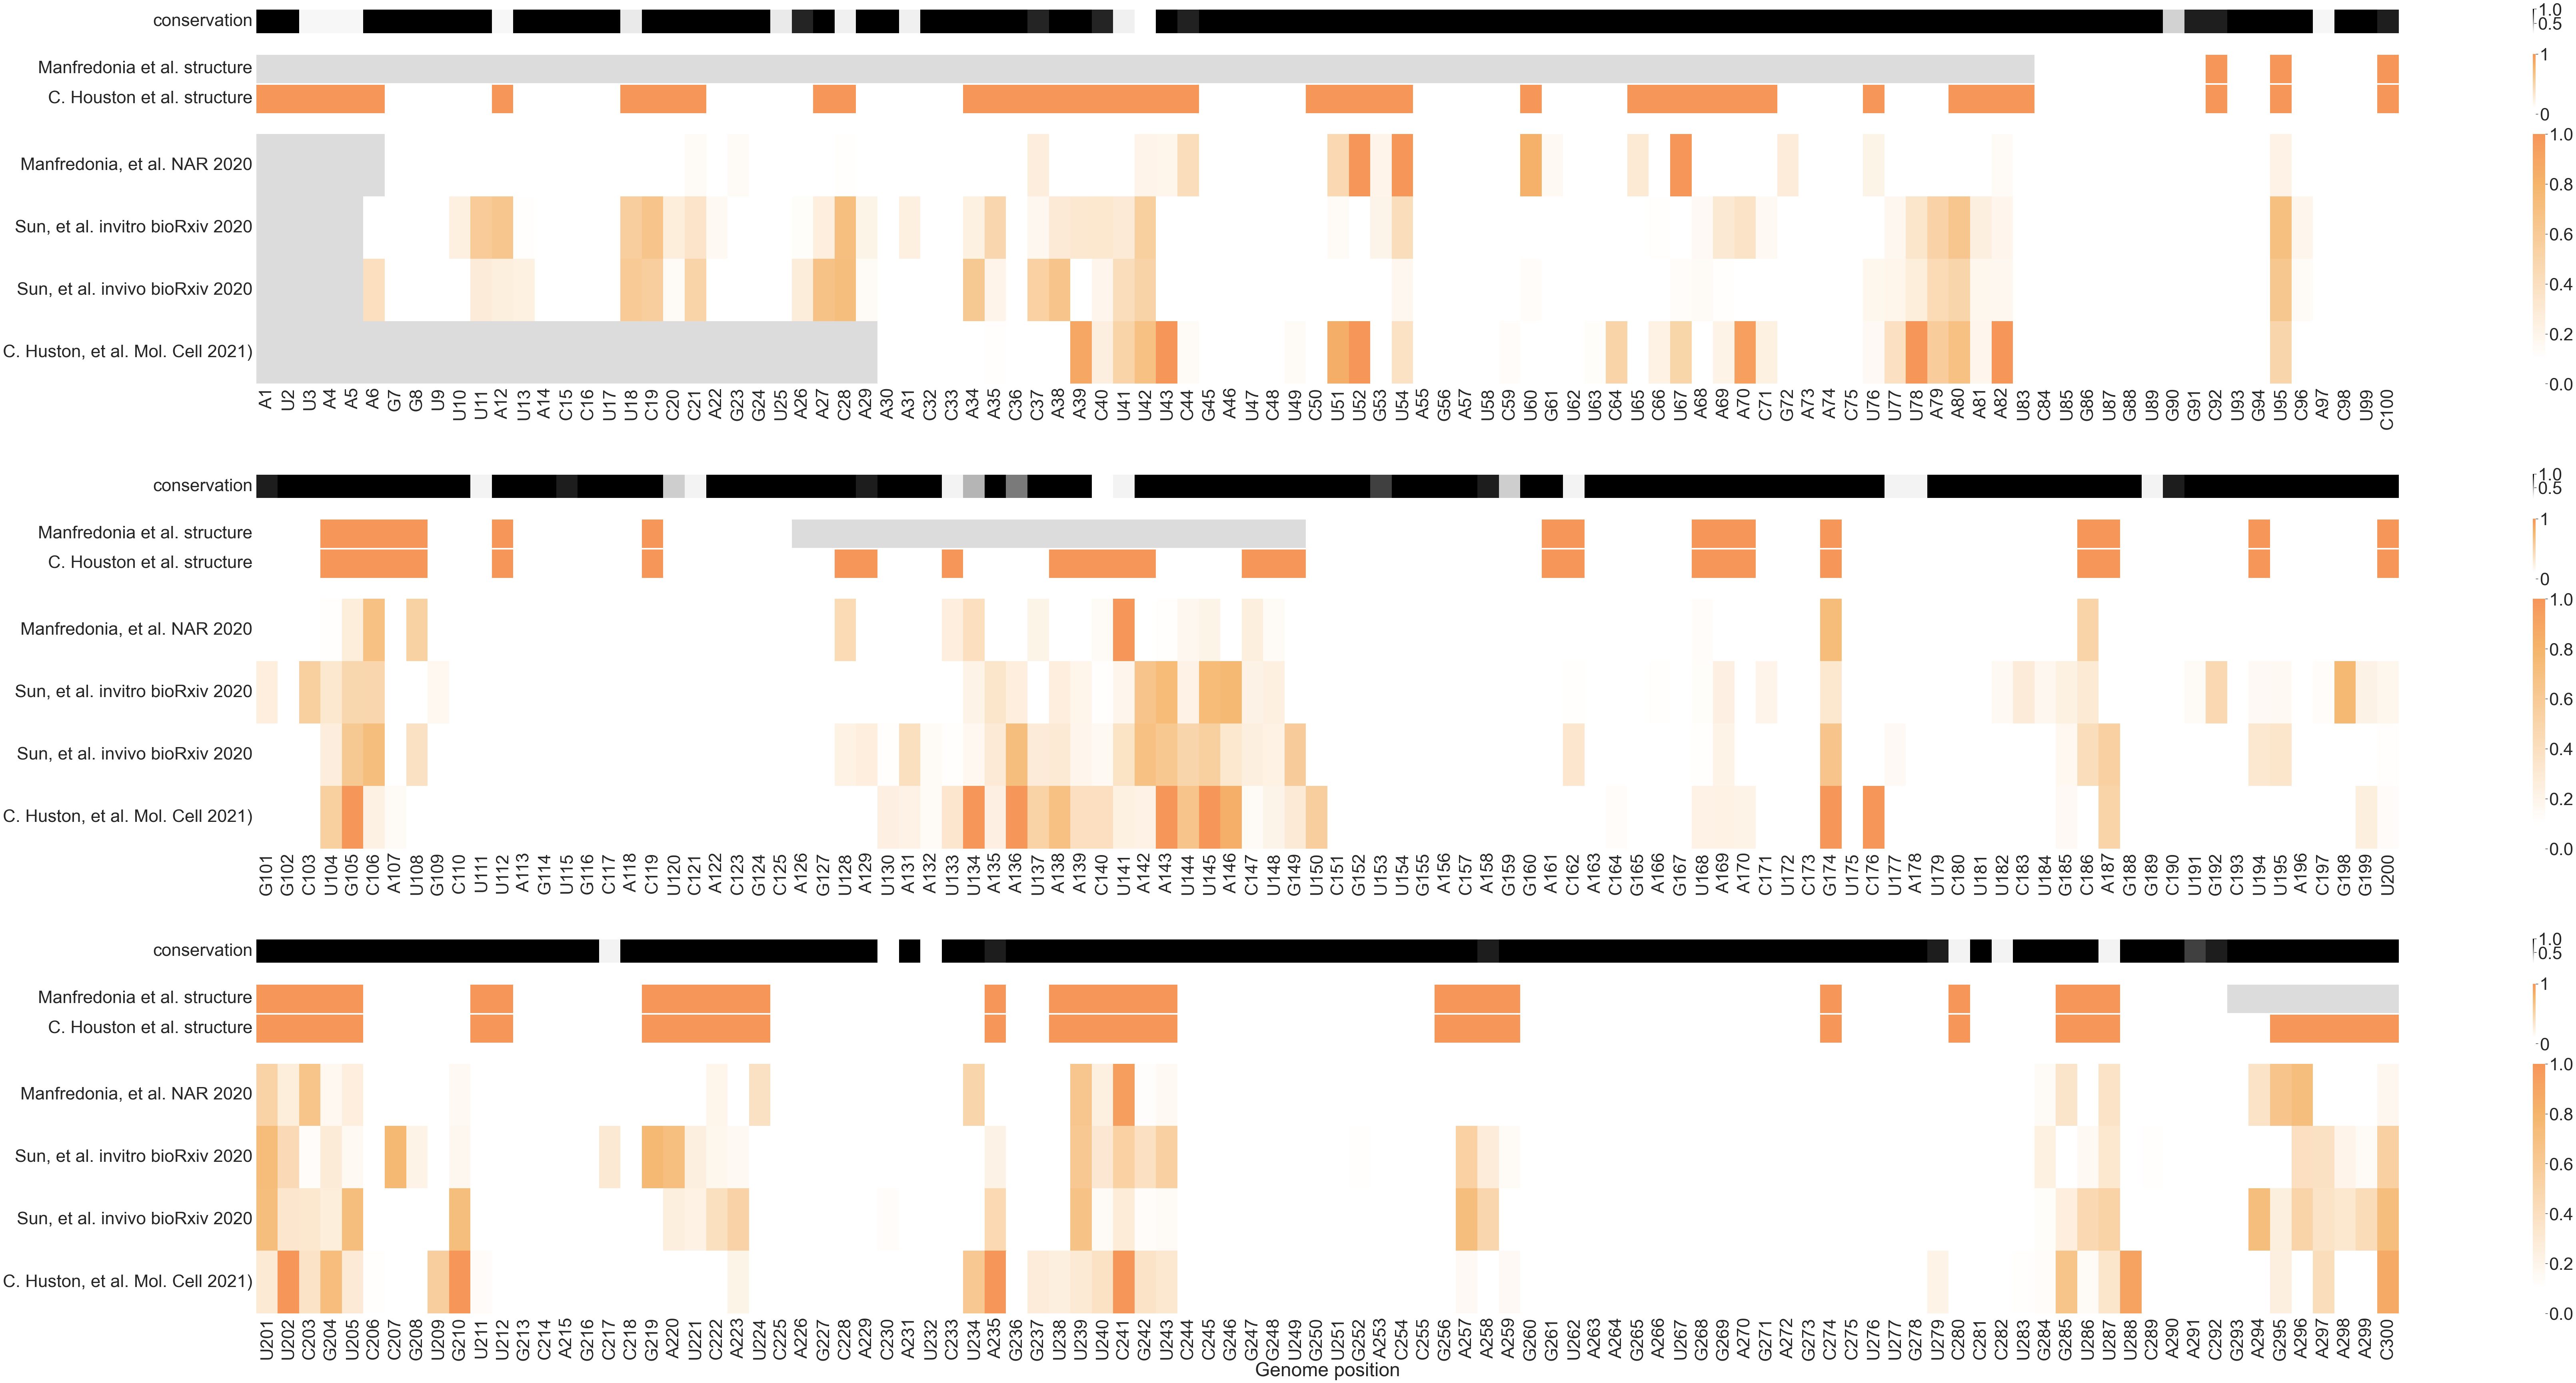

In [89]:
#heatmap for whole genome

import matplotlib as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('genome_wide_struct_comp_demo.pdf')
sns.set(font_scale = 4)


for idx in range(0, len(xaxis_whole_genome_frag) 3):  
    data1a = shape_norm_for_heatmap_incarnato_whole_genome_frag[idx]
    data2a = shape_norm_for_heatmap_zhang_invitro_whole_genome_frag[idx]
    data3a = shape_norm_for_heatmap_zhang_invivo_whole_genome_frag[idx]
    data4a = shape_norm_for_heatmap_pyle_whole_genome_frag[idx]
   
    xaxisa = xaxis_whole_genome_frag[idx]
    conservationa = conservation_whole_genome_frag[idx]
    incarnato_structa = incarnato_struct_track[idx]
    pyle_structa = pyle_struct_track[idx]

    
    data1b = shape_norm_for_heatmap_incarnato_whole_genome_frag[idx+1]
    data2b = shape_norm_for_heatmap_zhang_invitro_whole_genome_frag[idx+1]
    data3b = shape_norm_for_heatmap_zhang_invivo_whole_genome_frag[idx+1]
    data4b = shape_norm_for_heatmap_pyle_whole_genome_frag[idx+1]
    xaxisb = xaxis_whole_genome_frag[idx+1]
    conservationb = conservation_whole_genome_frag[idx+1]
    incarnato_structb = incarnato_struct_track[idx+1]
    pyle_structb = pyle_struct_track[idx+1]

    
    data1c = shape_norm_for_heatmap_incarnato_whole_genome_frag[idx+2]
    data2c = shape_norm_for_heatmap_zhang_invitro_whole_genome_frag[idx+2]
    data3c = shape_norm_for_heatmap_zhang_invivo_whole_genome_frag[idx+2]
    data4c = shape_norm_for_heatmap_pyle_whole_genome_frag[idx+2]
    xaxisc = xaxis_whole_genome_frag[idx+2]
    conservationc = conservation_whole_genome_frag[idx+2]
    incarnato_structc = incarnato_struct_track[idx+2]
    pyle_structc = pyle_struct_track[idx+2]

    
    data_a = np.array([data1a, data2a, data3a, data4a]) 
    data_b = np.array([data1b, data2b, data3b, data4b])
    data_c = np.array([data1c, data2c, data3c, data4c]) 

    # Move the data from a numpy array to a DataFrame with row and column labels
    

    # Now on to making the plot!
    
    from matplotlib.colors import LinearSegmentedColormap
    cdict = {'red': [[0, 1, 1], [0.1, 1, 1], [0.8, 0.96, 0.96], [1.0, 0.9666, 0.9666]],
            'green': [[0, 1, 1], [0.1, 1, 1], [0.8, 0.71, 0.71], [1.0, 0.59, 0.59]], 
            'blue': [[0, 1, 1], [0.1, 1, 1], [0.8, 0.42, 0.42], [1.0, 0.35, 0.35]]}
    color_map = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
    color_map_red = plt.cm.get_cmap('Reds') # Set up color scheme
    color_map.set_bad("gainsboro") # nan values will now be gray


    
    fig,ax = plt.subplots(11, 1, gridspec_kw={'height_ratios': [.5, 1.2, 5, 1, .5, 1.2, 5, 1, .5, 1.2, 5]},figsize=(120, 60))
    fig.subplots_adjust(wspace=0.50)

    data_df_a = pd.DataFrame(data=data_a, \
                index=["Manfredonia, et al. NAR 2020","Sun, et al. invitro bioRxiv 2020","Sun, et al. invivo bioRxiv 2020","C. Huston, et al. Mol. Cell 2021)"], \
                columns=xaxisa)
    mask = data_df_a.isnull() # Create a mask for all the "nan" values



    #Conservation track
    conservation_data_a = np.array([conservationa]) 
    conservation_data_df_a = pd.DataFrame(data=conservation_data_a, \
                index=["conservation"], \
                columns=xaxisa)
    conserv_heatmap_a = sns.heatmap(conservation_data_df_a, cmap='Greys', ax=ax[0], xticklabels=False)
    for i in range(conservation_data_df_a.shape[0] + 1):
        ax[0].axhline(i, color='white', lw=4)
    conserv_heatmap_a.set_yticklabels(conserv_heatmap_a.get_yticklabels(),va='center', rotation=0)

   
    #secondart structure track
    struct_data_a = np.array([incarnato_structa, pyle_structa]) 
    struct_data_df_a = pd.DataFrame(data=struct_data_a, \
                index=["Manfredonia et al. structure","C. Houston et al. structure"], \
                columns=xaxisa)
    struct_heatmap_a = sns.heatmap(struct_data_df_a, cmap=color_map, ax=ax[1], xticklabels=False)
    for i in range(struct_data_df_a.shape[0] + 1):
        ax[1].axhline(i, color='white', lw=4)
    struct_heatmap_a.set_yticklabels(struct_heatmap_a.get_yticklabels(),va='center', rotation=0)

    

    shape_heatmap = sns.heatmap(data_df_a, mask=mask, cmap=color_map, ax=ax[2])
    shape_heatmap.set_yticklabels(shape_heatmap.get_yticklabels(),va='center',)
    shape_heatmap.set_yticklabels(shape_heatmap.get_yticklabels(),va='center', rotation=0)
    

    ax[3].remove()

    
    ### SECOND
    
     # Move the data from a numpy array to a DataFrame with row and column labels
    data_df_b = pd.DataFrame(data=data_b, \
                index=["Manfredonia, et al. NAR 2020","Sun, et al. invitro bioRxiv 2020","Sun, et al. invivo bioRxiv 2020","C. Huston, et al. Mol. Cell 2021)"], \
                columns=xaxisb)
    mask = data_df_b.isnull() # Create a mask for all the "nan" values

    #Conservation track
    conservation_data_b = np.array([conservationb])
    conservation_data_df_b = pd.DataFrame(data=conservation_data_b, \
                index=["conservation"], \
                columns=xaxisb)
    conserv_heatmap_b = sns.heatmap(conservation_data_df_b, cmap='Greys', ax=ax[4], xticklabels=False)
    for i in range(conservation_data_df_b.shape[0] + 1):
        ax[4].axhline(i, color='white', lw=4)
    conserv_heatmap_b.set_yticklabels(conserv_heatmap_b.get_yticklabels(),va='center', rotation=0)

   
    
    struct_data_b = np.array([incarnato_structb, pyle_structb]) 
    struct_data_df_b = pd.DataFrame(data=struct_data_b, \
                index=["Manfredonia et al. structure","C. Houston et al. structure"], \
                columns=xaxisb)
    struct_heatmap_b = sns.heatmap(struct_data_df_b, cmap= color_map, ax=ax[5], xticklabels=False)
    for i in range(struct_data_df_b.shape[0] + 1):
        ax[5].axhline(i, color='white', lw=4)
    struct_heatmap_b.set_yticklabels(struct_heatmap_b.get_yticklabels(),va='center', rotation=0)


    shape_heatmap_b= sns.heatmap(data_df_b, mask=mask, cmap=color_map, ax=ax[6])
    shape_heatmap.set_yticklabels(shape_heatmap.get_yticklabels(),va='center',)
    shape_heatmap_b.set_yticklabels(shape_heatmap_b.get_yticklabels(),va='center', rotation=0)
    
    ax[7].remove()

    ##THIRD
    #Move the data from a numpy array to a DataFrame with row and column labels
    data_df_c = pd.DataFrame(data=data_c, \
                index=["Manfredonia, et al. NAR 2020","Sun, et al. invitro bioRxiv 2020","Sun, et al. invivo bioRxiv 2020","C. Huston, et al. Mol. Cell 2021)"], \
                columns=xaxisc)
    mask = data_df_c.isnull() # Create a mask for all the "nan" values

    #conservation track   
    conservation_data_c = np.array([conservationc])
    conservation_data_df_c = pd.DataFrame(data=conservation_data_c, \
                index=["conservation"], \
                columns=xaxisc)
    conserv_heatmap_c = sns.heatmap(conservation_data_df_c, cmap='Greys', ax=ax[8], xticklabels=False)
    for i in range(conservation_data_df_c.shape[0] + 1):
        ax[8].axhline(i, color='white', lw=4)
    conserv_heatmap_c.set_yticklabels(conserv_heatmap_c.get_yticklabels(),va='center', rotation=0)

   
   
    struct_data_c = np.array([incarnato_structc, pyle_structc]) 
    struct_data_df_c = pd.DataFrame(data=struct_data_c, \
                index=["Manfredonia et al. structure","C. Houston et al. structure"], \
                columns=xaxisc)
    struct_heatmap_c = sns.heatmap(struct_data_df_c, cmap=color_map, ax=ax[9], xticklabels=False)
    for i in range(struct_data_df_c.shape[0] + 1):
        ax[9].axhline(i, color='white', lw=4)
    struct_heatmap_c.set_yticklabels(struct_heatmap_c.get_yticklabels(),va='center', rotation=0)

    shape_heatmap_c = sns.heatmap(data_df_c, mask=mask, cmap=color_map, ax=ax[10])
    shape_heatmap.set_yticklabels(shape_heatmap.get_yticklabels(),va='center',)
    plt.xlabel("Genome position") # X axis label
    #plt.ylabel("Dataset") # Y axis label
    shape_heatmap_c.set_yticklabels(shape_heatmap_c.get_yticklabels(),va='center', rotation=0)
    
    pp.savefig(bbox_inches='tight')
pp.close()